# Project - Google Play Store

## Introduction 
#### The dataset is from the following link https://www.kaggle.com/datasets/lava18/google-play-store-apps

## Questions

1. What is the most expensive app in the store?
2. which genre (Category) has more apps?
3. What is the average size of the free apps and paid apps?
4. What is the 5 top expensive apps that has rate of 5?
5. How many apps that have more than 50K reviews?
6. What is the average price of the apps for each genre (Category) with each installs numbers?
7. What is the average price for apps have rating > 4.7
8. How much google earned from 10,000,000+ installed apps?
9. What is the maximum and minimum size for free and paid apps?
10. Is there a correlation between rating, reviews and size with the price of the app?
11. How many apps for each type of each content rating?
12. How many apps that can work on android version 4?
13. Which Category has more free or paid app
14. What is the most repeated content rating
15. Which category getting the highest average rating
16. Which App has maximum reviews
17. The relation between category and prices
18. How many Apps were issued per year

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

## Reading the file

In [2]:
df = pd.read_csv('/Users/user/iCloud Drive (Archive)/Documents/Data Science Diploma/Session 19/Assignement/Google Play Store Project/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Features

In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

483

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Observations 
#### Observations from the data  features.
* Total rows are 10841
* Total columns are 13

#### Observations for the null values
* Rating has 1474 rows that are null.
* Type has 1 row that is null.
* Content Rating has 1 row that is null.
* Current Version has 8 row that is null.
* Android Version has 3 row that is null.

#### Observations for the duplicate rows
* There are 483 duplicate rows

#### Observations for the numerical data (data type)
* The data type of rating is float which is matched with the numerical data.
* It was found the the data type of reviews, size and price are object (str) which is does not match with the numerical data and that we are goining to handle it.

## Data Processing

### 1 Fix the numerical data
#### 1.1 Fix reviews data

In [7]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='Reviews', ylabel='Category'>

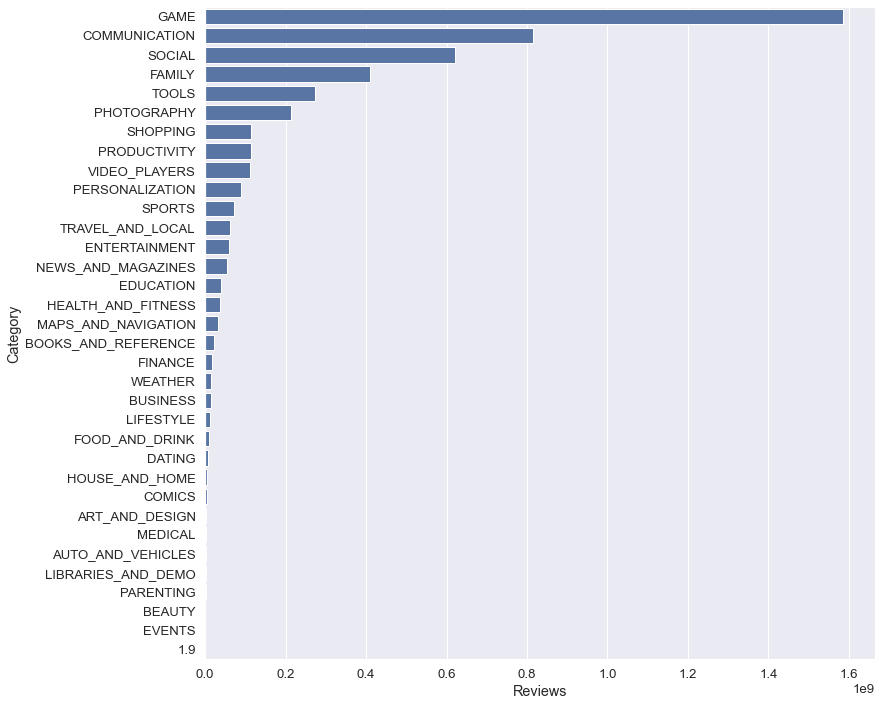

In [8]:
#Total Reviews
plt.figure(figsize=(12,12))
review = df.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False)
sns.barplot(data=df, x = review, y = review.index, color = sns.color_palette()[0])

#### 1.2 Fix size data

In [9]:
for s in df['Size'].unique():
    print (s)

# It is found that the data is separated into several parts:
# 1st part is with M (Mega pytes) can by handled by delete the M letter and keep the number in float type   
# 2nd part is with K (kilo pytes) can by handled by delete the k letter and keep the number in float type and then transfer the kilo bypte (float type) into Mega byptes
# 3rd part is with sign value (1,000 +) can be handled by assuing it be 1 Mega byte keep the number in float type 
# 4th part is only with one string value (Varies with device) that can handled by changing it to NAN or any other string type

19M
14M
8.7M
25M
2.8M
5.6M
29M
33M
3.1M
28M
12M
20M
21M
37M
2.7M
5.5M
17M
39M
31M
4.2M
7.0M
23M
6.0M
6.1M
4.6M
9.2M
5.2M
11M
24M
Varies with device
9.4M
15M
10M
1.2M
26M
8.0M
7.9M
56M
57M
35M
54M
201k
3.6M
5.7M
8.6M
2.4M
27M
2.5M
16M
3.4M
8.9M
3.9M
2.9M
38M
32M
5.4M
18M
1.1M
2.2M
4.5M
9.8M
52M
9.0M
6.7M
30M
2.6M
7.1M
3.7M
22M
7.4M
6.4M
3.2M
8.2M
9.9M
4.9M
9.5M
5.0M
5.9M
13M
73M
6.8M
3.5M
4.0M
2.3M
7.2M
2.1M
42M
7.3M
9.1M
55M
23k
6.5M
1.5M
7.5M
51M
41M
48M
8.5M
46M
8.3M
4.3M
4.7M
3.3M
40M
7.8M
8.8M
6.6M
5.1M
61M
66M
79k
8.4M
118k
44M
695k
1.6M
6.2M
18k
53M
1.4M
3.0M
5.8M
3.8M
9.6M
45M
63M
49M
77M
4.4M
4.8M
70M
6.9M
9.3M
10.0M
8.1M
36M
84M
97M
2.0M
1.9M
1.8M
5.3M
47M
556k
526k
76M
7.6M
59M
9.7M
78M
72M
43M
7.7M
6.3M
334k
34M
93M
65M
79M
100M
58M
50M
68M
64M
67M
60M
94M
232k
99M
624k
95M
8.5k
41k
292k
11k
80M
1.7M
74M
62M
69M
75M
98M
85M
82M
96M
87M
71M
86M
91M
81M
92M
83M
88M
704k
862k
899k
378k
266k
375k
1.3M
975k
980k
4.1M
89M
696k
544k
525k
920k
779k
853k
720k
713k
772k
318k
58k
241k


In [10]:
def fix_size(s):
    try: 
        if s.endswith ('M'):
            return float(s[:-1])
        elif s.endswith ('k'):
            return float(s[:-1]) / 1024
        elif s == '1,000+':
            return 1.0
        else:
            return np.nan
    except:
        return np.nan

In [11]:
fix_size('1.3M')

1.3

In [12]:
df['Size'] = df['Size'].apply(fix_size)
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float64

In [13]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


#### 1.3 Fix Price

In [15]:
for p in df['Price'].unique():
    print(p)
    
# It is found that the data is separated into several parts:
# 1st part is the data containing $ symbol can by handled by delete the symbol and keep the number in float type   
# 2nd part is the data contaning with zero number(0) can by handled by 
# 3rd part is the data contaning with string value (Everyone) can be handled replace it with zero (0) and keep the number in float type 

0
$4.99
$3.99
$6.99
$1.49
$2.99
$7.99
$5.99
$3.49
$1.99
$9.99
$7.49
$0.99
$9.00
$5.49
$10.00
$24.99
$11.99
$79.99
$16.99
$14.99
$1.00
$29.99
$12.99
$2.49
$10.99
$1.50
$19.99
$15.99
$33.99
$74.99
$39.99
$3.95
$4.49
$1.70
$8.99
$2.00
$3.88
$25.99
$399.99
$17.99
$400.00
$3.02
$1.76
$4.84
$4.77
$1.61
$2.50
$1.59
$6.49
$1.29
$5.00
$13.99
$299.99
$379.99
$37.99
$18.99
$389.99
$19.90
$8.49
$1.75
$14.00
$4.85
$46.99
$109.99
$154.99
$3.08
$2.59
$4.80
$1.96
$19.40
$3.90
$4.59
$15.46
$3.04
$4.29
$2.60
$3.28
$4.60
$28.99
$2.95
$2.90
$1.97
$200.00
$89.99
$2.56
$30.99
$3.61
$394.99
$1.26
Everyone
$1.20
$1.04


In [16]:
def fix_price(p):
    try: 
        if p.startswith ('$'):
            return float(p[1:])
        elif p == 'Everyone' or p == '0':
            return float(0)
    except:
        return np.nan

In [17]:
fix_price('$1.26')

1.26

In [18]:
df['Price'] = df['Price'].apply(fix_price)
df['Price'].sum()

11136.670000000002

In [19]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'FINANCE'),
  Text(1, 0, 'FAMILY'),
  Text(2, 0, 'LIFESTYLE'),
  Text(3, 0, 'MEDICAL'),
  Text(4, 0, 'GAME'),
  Text(5, 0, 'TOOLS'),
  Text(6, 0, 'PRODUCTIVITY'),
  Text(7, 0, 'BUSINESS'),
  Text(8, 0, 'PERSONALIZATION'),
  Text(9, 0, 'PHOTOGRAPHY'),
  Text(10, 0, 'BOOKS_AND_REFERENCE'),
  Text(11, 0, 'EVENTS'),
  Text(12, 0, 'SPORTS'),
  Text(13, 0, 'COMMUNICATION'),
  Text(14, 0, 'HEALTH_AND_FITNESS'),
  Text(15, 0, 'TRAVEL_AND_LOCAL'),
  Text(16, 0, 'WEATHER'),
  Text(17, 0, 'DATING'),
  Text(18, 0, 'MAPS_AND_NAVIGATION'),
  Text(19, 0, 'EDUCATION'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'AUTO_AND_VEHICLES'),
  Text(22, 0, 'VIDEO_PLAYERS'),
  Text(23, 0, 'PARENTING'),
  Text(24, 0, 'FOOD_AND_DRINK'),
  Text(25, 0, 'ENTERTAINMENT'),
  Text(26, 0, 'ART_AND_DESIGN'),
  Text(27, 0, 'SHOPPING'),
  Text(28, 0, 'NEWS_AND_MAG

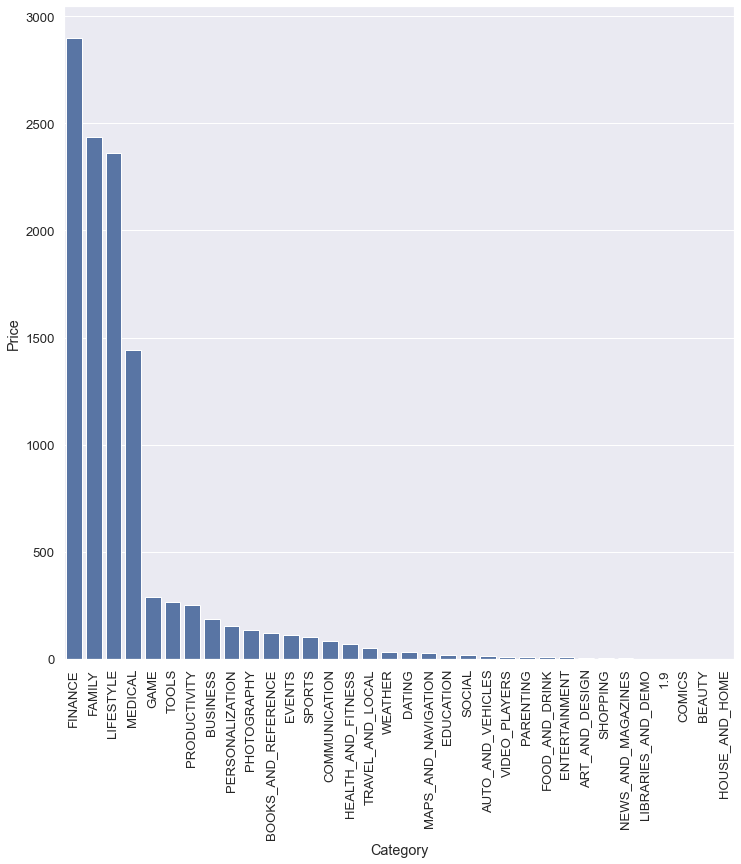

In [21]:
plt.figure(figsize=(12,12))
price = df.groupby(['Category'])['Price'].sum().sort_values(ascending=False)
sns.barplot(data = df, x = price.index, y = price , color = sns.color_palette()[0])
plt.xticks(rotation = 90)

### 2. Fix Rating

In [22]:
df.describe()
# it was found that the maxmimum rating is 19 which is not logic as the logic max should by 5

,Rating,Reviews,Size,Price
count,9367.000000,1.084000e+04,9146.000000,10841.000000
mean,4.193338,4.441529e+05,21.513922,1.027273
std,0.537431,2.927761e+06,22.588868,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,19.000000,7.815831e+07,100.000000,400.000000


In [23]:
index = df[df['Rating'] > 5 ].index
index

Int64Index([10472], dtype='int64')

In [24]:
df.drop(index, axis = 0, inplace = True)

In [25]:
df.describe()
# The maxmium amount if fixed with 5

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,9145.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.515219,2.927761e+06,22.589084,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


Text(0.5, 1.0, 'Rating Distribution')

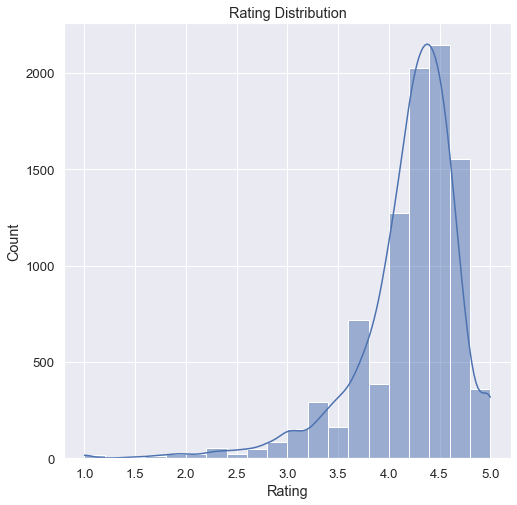

In [26]:
sns.histplot(data = df, x = 'Rating', bins = 20, kde = True )
plt.title('Rating Distribution')

<AxesSubplot:xlabel='Rating', ylabel='Category'>

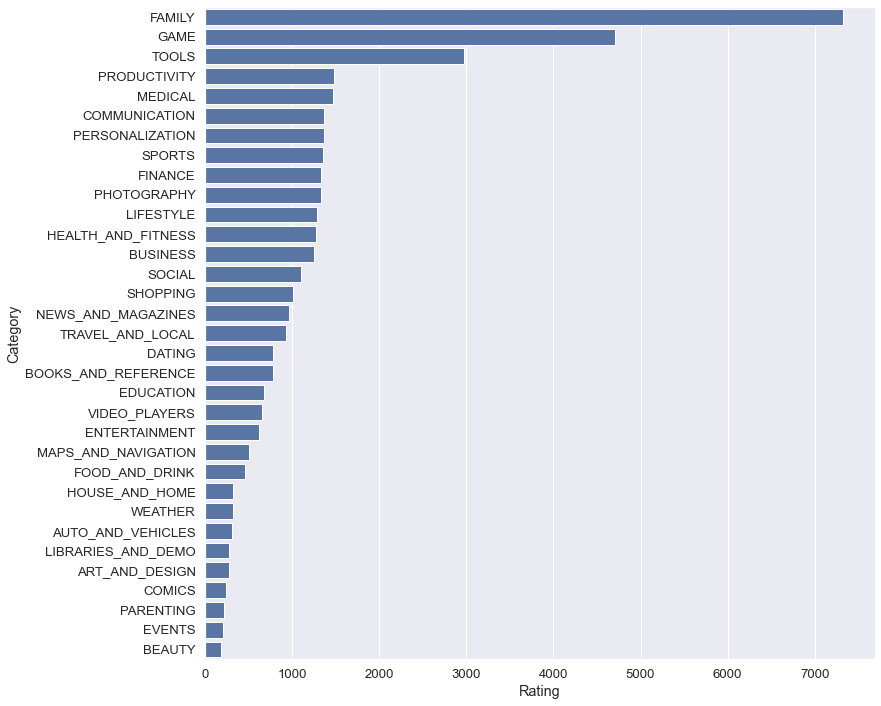

In [27]:
#Rating by category
plt.figure(figsize=(12,12))
rate = df.groupby(['Category'])['Rating'].sum().sort_values(ascending=False)
sns.barplot(data = df, x = rate, y = rate.index, color = sns.color_palette()[0] )

## 3. Fix Categorical Data

#### 3.1 Fix Category

In [28]:
df['Category'] = df['Category'].apply(lambda c: c.title())

for c in df['Category'].unique():
    print (c)

Art_And_Design
Auto_And_Vehicles
Beauty
Books_And_Reference
Business
Comics
Communication
Dating
Education
Entertainment
Events
Finance
Food_And_Drink
Health_And_Fitness
House_And_Home
Libraries_And_Demo
Lifestyle
Game
Family
Medical
Social
Shopping
Photography
Sports
Travel_And_Local
Tools
Personalization
Productivity
Parenting
Weather
Video_Players
News_And_Magazines
Maps_And_Navigation


In [29]:
def fix_category(cat):
    try: 
        if cat.upper():
            return cat.title()
        else:
            return np.nan
    except:
        return np.nan

In [30]:
cat = df['Category'].apply(fix_category)

In [31]:
cat

0             Art_And_Design
1             Art_And_Design
2             Art_And_Design
3             Art_And_Design
4             Art_And_Design
                ...         
10836                 Family
10837                 Family
10838                Medical
10839    Books_And_Reference
10840              Lifestyle
Name: Category, Length: 10840, dtype: object

In [32]:
df['Category'] = cat.astype(str).replace('_', ' ', regex = True)

In [33]:
df['Category']

0             Art And Design
1             Art And Design
2             Art And Design
3             Art And Design
4             Art And Design
                ...         
10836                 Family
10837                 Family
10838                Medical
10839    Books And Reference
10840              Lifestyle
Name: Category, Length: 10840, dtype: object

In [34]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art And Design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art And Design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,Books And Reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


<AxesSubplot:xlabel='Category'>

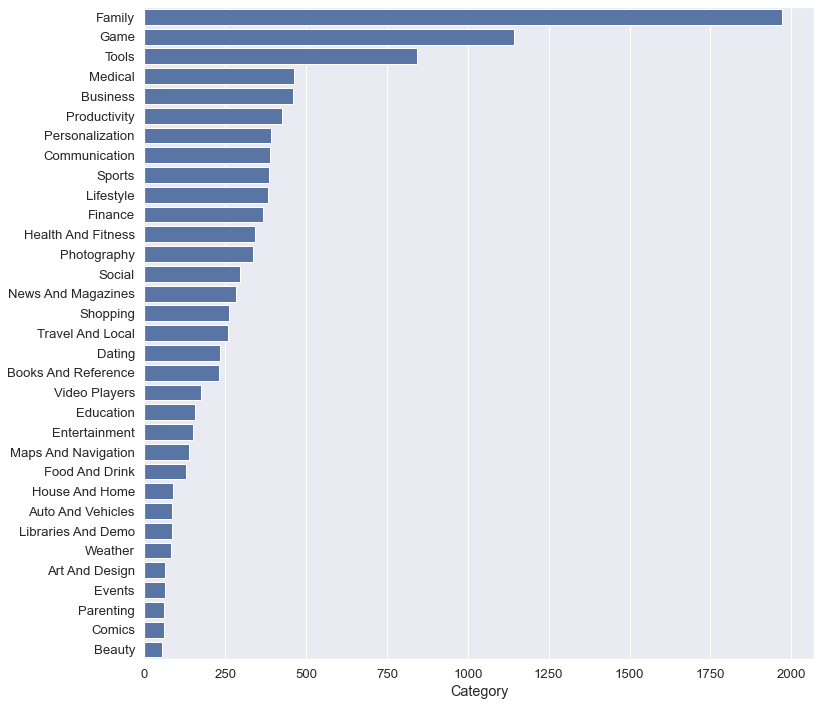

In [35]:
plt.figure(figsize=(12,12))
cat = df.Category.value_counts()
sns.barplot(data = df, x = cat, y = cat.index, color = sns.color_palette()[0])

#### 3.2 Check Installs

In [36]:
for i in df['Installs'].unique():
    print (i)
    

10,000+
500,000+
5,000,000+
50,000,000+
100,000+
50,000+
1,000,000+
10,000,000+
5,000+
100,000,000+
1,000,000,000+
1,000+
500,000,000+
50+
100+
500+
10+
1+
5+
0+
0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1,000,000+'),
  Text(1, 0, '10,000,000+'),
  Text(2, 0, '100,000+'),
  Text(3, 0, '10,000+'),
  Text(4, 0, '1,000+'),
  Text(5, 0, '5,000,000+'),
  Text(6, 0, '100+'),
  Text(7, 0, '500,000+'),
  Text(8, 0, '50,000+'),
  Text(9, 0, '5,000+'),
  Text(10, 0, '100,000,000+'),
  Text(11, 0, '10+'),
  Text(12, 0, '500+'),
  Text(13, 0, '50,000,000+'),
  Text(14, 0, '50+'),
  Text(15, 0, '5+'),
  Text(16, 0, '500,000,000+'),
  Text(17, 0, '1+'),
  Text(18, 0, '1,000,000,000+'),
  Text(19, 0, '0+'),
  Text(20, 0, '0')])

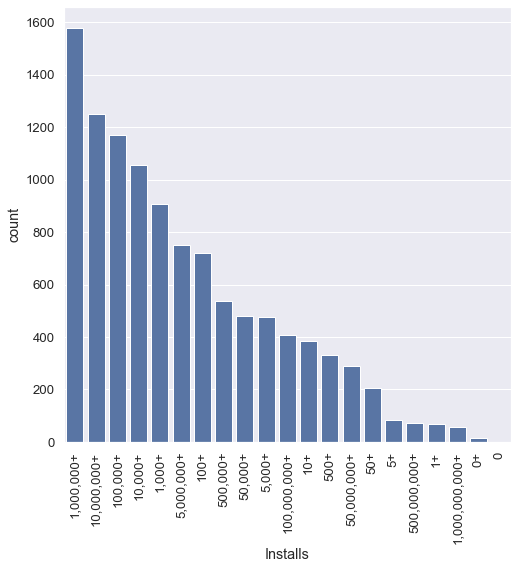

In [37]:
idx = df['Installs'].value_counts().index
sns.countplot(data = df, x = 'Installs', color = sns.color_palette()[0], order = idx)
plt.xticks(rotation = 90)

#### 3.3 Check Type

In [38]:
for t in df['Type'].unique():
    print (t)

Free
Paid
nan


#### 3.4 Check Content Rating

In [39]:
for r in df['Content Rating'].unique():
    print (r)

Everyone
Teen
Everyone 10+
Mature 17+
Adults only 18+
Unrated


### 4. Fix Data Time

In [40]:
for t in df['Last Updated'].unique():
    print (t)

January 7, 2018
January 15, 2018
August 1, 2018
June 8, 2018
June 20, 2018
March 26, 2017
April 26, 2018
June 14, 2018
September 20, 2017
July 3, 2018
October 27, 2017
July 31, 2018
April 2, 2018
June 26, 2018
August 3, 2018
June 6, 2018
November 7, 2017
July 30, 2018
April 20, 2018
March 20, 2018
July 12, 2018
March 7, 2018
July 7, 2018
April 25, 2018
October 11, 2017
March 21, 2018
August 22, 2017
May 31, 2018
July 19, 2018
January 6, 2018
April 27, 2018
July 11, 2018
August 2, 2018
July 14, 2018
November 29, 2017
March 31, 2018
July 20, 2018
April 15, 2018
January 3, 2018
November 14, 2017
December 17, 2017
May 28, 2018
May 10, 2018
July 26, 2018
July 18, 2018
July 29, 2018
August 26, 2014
July 8, 2018
July 28, 2018
June 12, 2018
October 14, 2016
May 25, 2018
July 16, 2018
July 27, 2018
July 4, 2018
March 27, 2018
July 15, 2018
July 24, 2018
July 23, 2018
August 4, 2018
May 16, 2018
June 2, 2018
April 21, 2018
November 9, 2017
May 15, 2018
October 24, 2016
February 28, 2018
July 25,

In [41]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [42]:
df['year'] = pd.DatetimeIndex(df['Last Updated']).year
df['month'] = pd.DatetimeIndex(df['Last Updated']).month
df['day'] = pd.DatetimeIndex(df['Last Updated']).day

### 5. Fix Dublicate rows 

In [43]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### 6. Fix the Null Values 

In [44]:
df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size              1526
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
year                 0
month                0
day                  0
dtype: int64

#### 6.1 Fix numerical null values

In [45]:
def impute_median(series):
    return series.fillna(series .median())

In [46]:
df['Rating'] = df['Rating'].transform(impute_median)
df['Size'] = df['Size'].transform(impute_median)

In [47]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
year              0
month             0
day               0
dtype: int64

#### 6.2 Another solution for fix numerical null values

In [48]:
from sklearn.impute import KNNImputer

In [49]:
imputer = KNNImputer()

In [50]:
df['Rating'] = imputer.fit_transform(df[['Rating']])
df['Size'] = imputer.fit_transform(df[['Size']])

In [51]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
year              0
month             0
day               0
dtype: int64

#### 6.3 Fix categorical null values

In [52]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace = True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace = True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace = True)

In [53]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
year              0
month             0
day               0
dtype: int64

#### 6.4 Another solution for fix the categorical null values

In [54]:
from sklearn.impute import SimpleImputer

In [55]:
imputer = SimpleImputer(strategy = 'most_frequent')
df['Type'] = imputer.fit_transform (df[['Type']])
df['Current Ver'] = imputer.fit_transform (df[['Current Ver']])
df['Android Ver'] = imputer.fit_transform (df[['Android Ver']])

In [56]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
year              0
month             0
day               0
dtype: int64

## Answers

### 1. What is the most expensive app in the store?

In [57]:
df[df['Price']== df['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
4367,I'm Rich - Trump Edition,Lifestyle,3.6,275.0,7.3,"10,000+",Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,2018,5,3


### 2. Which genre (Category) has more apps?

In [58]:
df['Category'].value_counts().sort_values(ascending = False)

Family                 1943
Game                   1121
Tools                   843
Business                427
Medical                 408
Productivity            407
Personalization         388
Lifestyle               373
Communication           366
Finance                 360
Sports                  351
Photography             322
Health And Fitness      306
Social                  280
News And Magazines      264
Travel And Local        237
Books And Reference     230
Shopping                224
Dating                  196
Video Players           175
Maps And Navigation     137
Education               130
Food And Drink          124
Entertainment           111
Auto And Vehicles        85
Libraries And Demo       85
Weather                  82
House And Home           80
Art And Design           65
Events                   64
Parenting                60
Comics                   60
Beauty                   53
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Art And Design'),
  Text(1, 0, 'Auto And Vehicles'),
  Text(2, 0, 'Beauty'),
  Text(3, 0, 'Books And Reference'),
  Text(4, 0, 'Business'),
  Text(5, 0, 'Comics'),
  Text(6, 0, 'Communication'),
  Text(7, 0, 'Dating'),
  Text(8, 0, 'Education'),
  Text(9, 0, 'Entertainment'),
  Text(10, 0, 'Events'),
  Text(11, 0, 'Finance'),
  Text(12, 0, 'Food And Drink'),
  Text(13, 0, 'Health And Fitness'),
  Text(14, 0, 'House And Home'),
  Text(15, 0, 'Libraries And Demo'),
  Text(16, 0, 'Lifestyle'),
  Text(17, 0, 'Game'),
  Text(18, 0, 'Family'),
  Text(19, 0, 'Medical'),
  Text(20, 0, 'Social'),
  Text(21, 0, 'Shopping'),
  Text(22, 0, 'Photography'),
  Text(23, 0, 'Sports'),
  Text(24, 0, 'Travel And Local'),
  Text(25, 0, 'Tools'),
  Text(26, 0, 'Personalization'),
  Text(27, 0, 'Productivity'),
  Text(28, 0, 'Parenting'),
  Text(

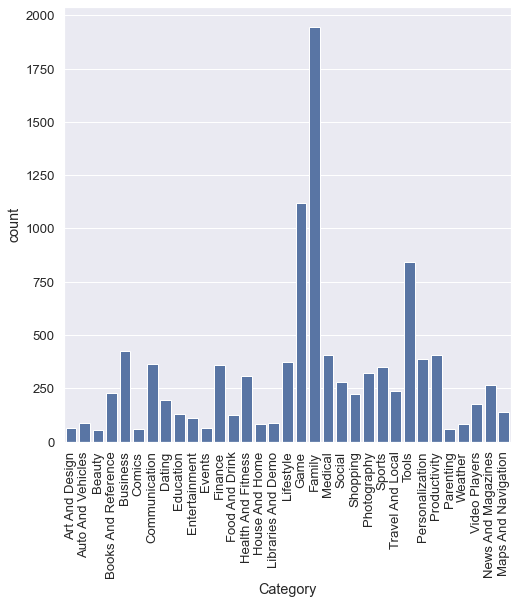

In [59]:
sns.countplot(data = df , x = 'Category',color = sns.color_palette()[0])
plt.xticks(rotation = 90)

### 3. What is the average size of the free apps and paid apps?

In [60]:
df.groupby('Type').mean()['Size']

Type
Free    20.188772
Paid    18.531302
Name: Size, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='Size'>

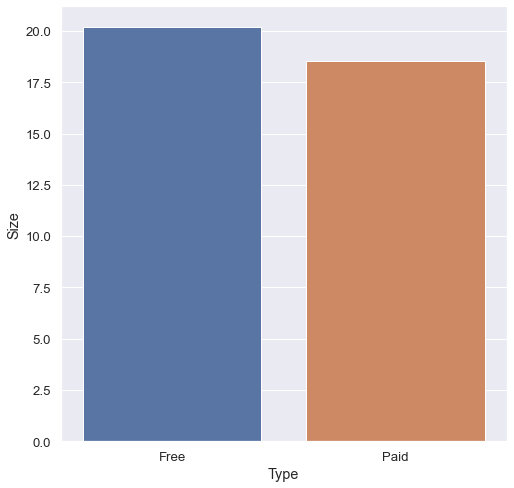

In [61]:
sns.barplot(data = df, x = 'Type', y = 'Size',ci = None)

### 4. What is the 5 top expensive apps that has rate of 5?

In [62]:
df[df['Rating'] == 5].sort_values(by = 'Price', ascending = False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
5489,AP Art History Flashcards,Family,5.0,1.0,96.000000,10+,Paid,29.99,Mature 17+,Education,2016-01-19,3.30,4.0 and up,2016,1,19
7477,USMLE Step 2 CK Flashcards,Family,5.0,1.0,40.000000,10+,Paid,19.99,Everyone,Education,2014-05-26,2.47,2.2 and up,2014,5,26
5246,Hey AJ! It's Bedtime!,Family,5.0,1.0,63.000000,10+,Paid,4.99,Everyone,Education,2018-04-04,1.0.59,2.3 and up,2018,4,4
5482,meStudying: AP English Lit,Family,5.0,1.0,0.639648,10+,Paid,4.99,Everyone,Education,2013-08-31,1.3,2.0.1 and up,2013,8,31
7204,TI-84 CE Graphing Calculator Manual TI 84,Family,5.0,1.0,27.000000,100+,Paid,4.99,Everyone,Education,2018-03-28,1.5.2,4.1 and up,2018,3,28


### 5. How many apps that have more than 50K reviews?

In [63]:
df[df['Reviews']> 50000].sort_values(by = 'Reviews', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day
2544,Facebook,Social,4.1,78158306.0,13.0,"1,000,000,000+",Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,2018,8,3
3943,Facebook,Social,4.1,78128208.0,13.0,"1,000,000,000+",Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,2018,8,3
336,WhatsApp Messenger,Communication,4.4,69119316.0,13.0,"1,000,000,000+",Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,2018,8,3
3904,WhatsApp Messenger,Communication,4.4,69109672.0,13.0,"1,000,000,000+",Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,2018,8,3
2604,Instagram,Social,4.5,66577446.0,13.0,"1,000,000,000+",Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,2018,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,Calorie Counter - EasyFit free,Health And Fitness,4.7,50294.0,11.0,"1,000,000+",Free,0.0,Everyone,Health & Fitness,2018-07-09,3.0.7,4.1 and up,2018,7,9
3046,Fantasy Football,Sports,3.5,50179.0,23.0,"1,000,000+",Free,0.0,Everyone,Sports,2018-08-02,2.5.7.1,5.0 and up,2018,8,2
8294,Bokeh (Background defocus),Photography,4.0,50109.0,13.0,"10,000,000+",Free,0.0,Everyone,Photography,2018-06-07,Varies with device,Varies with device,2018,6,7
9677,Masha and The Bear Jam Day Match 3 games for kids,Family,4.6,50060.0,98.0,"1,000,000+",Free,0.0,Everyone,Puzzle;Brain Games,2018-08-07,1.4.83,4.1 and up,2018,8,7


### 6. What is the average price of the apps for each genre (Category) with each installs numbers?

In [64]:
df_pivot = pd.pivot_table(data = df, index = 'Category',columns = ['Installs'],values = 'Price')
df_pivot

Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,...,"100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,,
Art And Design,NaN,0.000,NaN,0.663333,0.000000,NaN,NaN,0.180909,0.000000,0.000000,...,NaN,NaN,0.398000,0.0,NaN,0.000000,0.0,NaN,0.000000,NaN
Auto And Vehicles,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.248333,...,NaN,0.000000,0.000000,0.0,9.990000,0.398000,NaN,0.000000,0.000000,NaN
Beauty,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,NaN
Books And Reference,NaN,NaN,5.990000,0.149118,0.000000,0.0,3.996842,0.179600,0.000000,0.570000,...,0.0,1.852857,0.474375,0.0,0.583333,0.000000,NaN,0.220000,0.000000,NaN
Business,NaN,0.000,0.000000,0.183265,0.000000,NaN,2.201905,0.065000,0.000000,0.432763,...,0.0,0.055000,0.000000,0.0,0.359600,0.000000,0.0,0.782174,0.000000,NaN
Comics,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,NaN
Communication,NaN,NaN,0.000000,0.294091,0.066444,0.0,1.392105,0.478400,0.000000,0.210606,...,0.0,0.000000,0.393158,0.0,0.000000,0.000000,0.0,0.906364,0.000000,0.0
Dating,NaN,NaN,0.000000,0.537692,0.000000,NaN,0.000000,0.362727,0.000000,0.880588,...,NaN,0.000000,0.000000,0.0,0.248333,0.000000,NaN,0.000000,0.000000,NaN
Education,NaN,NaN,NaN,4.990000,0.000000,NaN,NaN,0.000000,0.000000,NaN,...,0.0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.306923,NaN


<AxesSubplot:xlabel='Installs', ylabel='Category'>

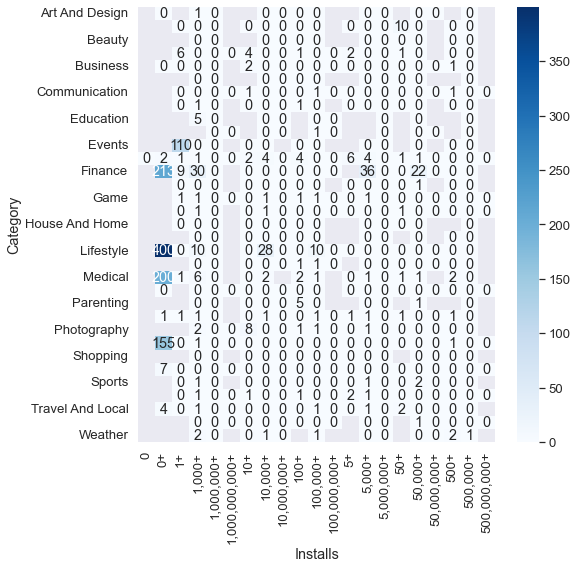

In [65]:
sns.heatmap(df_pivot, annot=True, fmt = '0.00f', cmap = 'Blues')

### 7. What is the average price for apps have rating > 4.7

In [66]:
df[df['Rating']> 4.7]['Price'].mean()

0.4550000000000003

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.2'),
  Text(2, 0, '1.4'),
  Text(3, 0, '1.5'),
  Text(4, 0, '1.6'),
  Text(5, 0, '1.7'),
  Text(6, 0, '1.8'),
  Text(7, 0, '1.9'),
  Text(8, 0, '2.0'),
  Text(9, 0, '2.1'),
  Text(10, 0, '2.2'),
  Text(11, 0, '2.3'),
  Text(12, 0, '2.4'),
  Text(13, 0, '2.5'),
  Text(14, 0, '2.6'),
  Text(15, 0, '2.7'),
  Text(16, 0, '2.8'),
  Text(17, 0, '2.9'),
  Text(18, 0, '3.0'),
  Text(19, 0, '3.1'),
  Text(20, 0, '3.2'),
  Text(21, 0, '3.3'),
  Text(22, 0, '3.4'),
  Text(23, 0, '3.5'),
  Text(24, 0, '3.6'),
  Text(25, 0, '3.7'),
  Text(26, 0, '3.8'),
  Text(27, 0, '3.9'),
  Text(28, 0, '4.0'),
  Text(29, 0, '4.1'),
  Text(30, 0, '4.2'),
  Text(31, 0, '4.3'),
  Text(32, 0, '4.4'),
  Text(33, 0, '4.5'),
  Text(34, 0, '4.6'),
  Text(35, 0, '4.7'),
  Text(36, 0, '4.8'),
  Text(37, 0, 

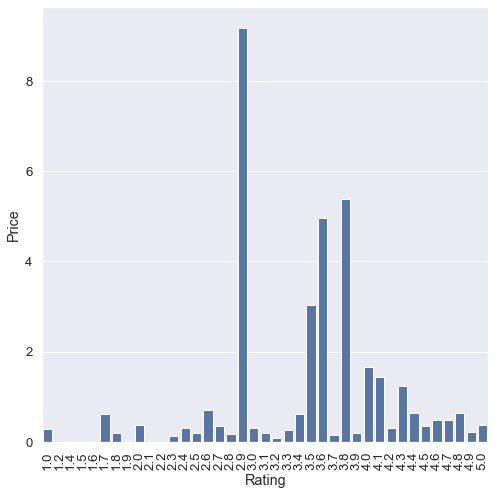

In [67]:
rating = df[df['Rating']> 4.7]['Price']
sns.barplot(data = df, x = 'Rating', y = 'Price',ci = None , color = sns.color_palette()[0])
plt.xticks(rotation = 90)

### 8. How much google earned from 10,000,000+ installed apps?

In [68]:
df[df['Installs']== '10,000,000+']['Price'].sum()

14.97

### 9. What is the maximum and minimum size for free and paid apps?

In [69]:
df.groupby('Type').describe()['Size']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,9592.0,20.188772,21.005502,0.008301,5.9,13.0,26.0,100.0
Paid,765.0,18.531302,21.154571,0.013672,3.4,13.0,25.0,100.0


<AxesSubplot:xlabel='Type', ylabel='Size'>

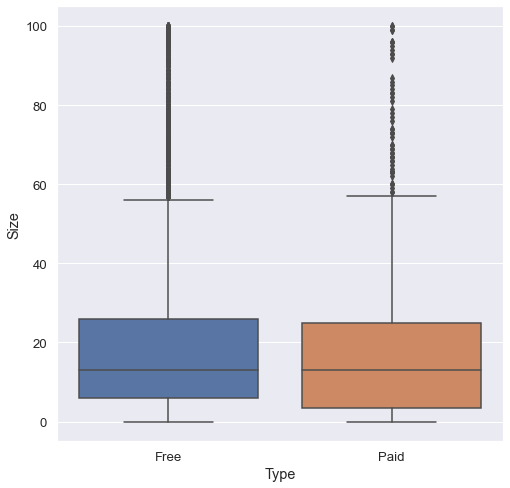

In [70]:
sns.boxplot(data = df, x = 'Type',y = 'Size', palette=None)

### 10. Is there a correlation between rating, reviews and size with the price of the app?

#### 10.1 First solution for correlation

In [113]:
df.corr()

,Rating,Reviews,Size,Price,year,month,day
Rating,1.000000,0.063465,0.052706,-0.019709,0.123248,0.013217,-0.007376
Reviews,0.063465,1.000000,0.107819,-0.009417,0.075744,0.044681,-0.024677
Size,0.052706,0.107819,1.000000,-0.020537,0.186399,0.027337,-0.000163
Price,-0.019709,-0.009417,-0.020537,1.000000,-0.005627,0.006490,-0.008480
year,0.123248,0.075744,0.186399,-0.005627,1.000000,-0.190497,-0.015239
month,0.013217,0.044681,0.027337,0.006490,-0.190497,1.000000,-0.074367
day,-0.007376,-0.024677,-0.000163,-0.008480,-0.015239,-0.074367,1.000000


In [75]:
corr_rate = df['Rating'].corr(df['Price'])
corr_review = df['Reviews'].corr(df['Price'])
corr_size = df['Size'].corr(df['Price'])

In [76]:
print (corr_rate)
print (corr_review)
print (corr_size)

-0.019708982321947243
-0.009417025916928251
-0.02053650813037465


#### 10.2 Second solution for correlation

In [112]:
df.corr()[:4]['Price']

Rating    -0.019709
Reviews   -0.009417
Size      -0.020537
Price      1.000000
Name: Price, dtype: float64

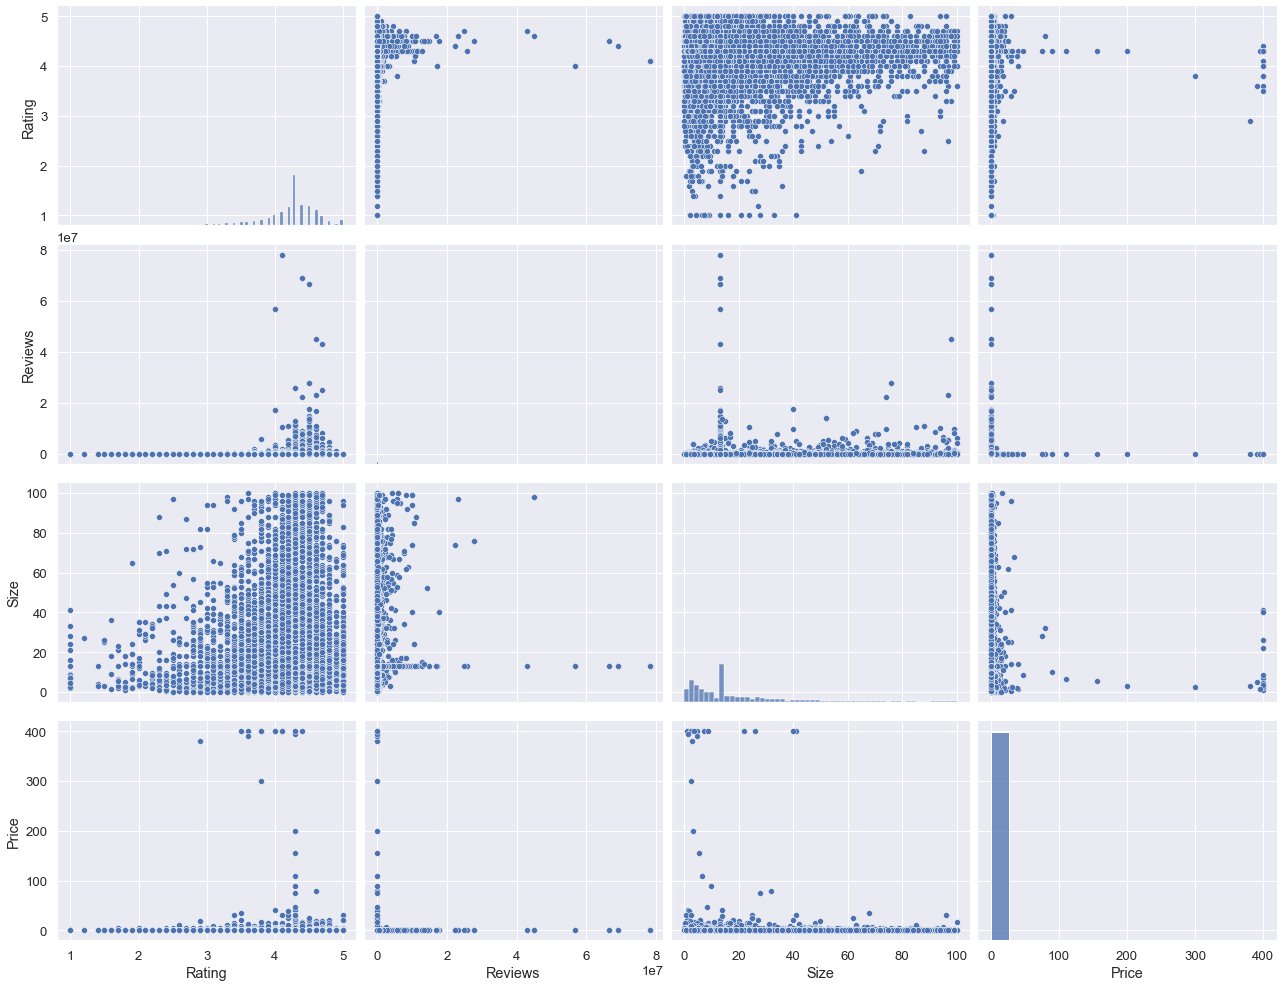

In [114]:
sns.pairplot(df,vars=['Rating', 'Reviews','Size','Price'],height=3.5, aspect= 1.3)

<AxesSubplot:>

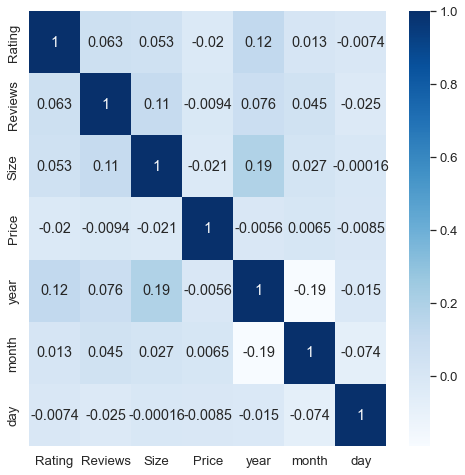

In [116]:
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')

### 11. How many apps for each type of each content rating?

In [117]:
df_pivot = pd.pivot_table(data = df, index = 'Type',columns = ['Content Rating'],values = 'Rating',aggfunc = 'count')
df_pivot

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3.0,7720.0,345.0,428.0,1094.0,2.0
Paid,NaN,662.0,32.0,19.0,52.0,NaN


<AxesSubplot:xlabel='Content Rating', ylabel='Type'>

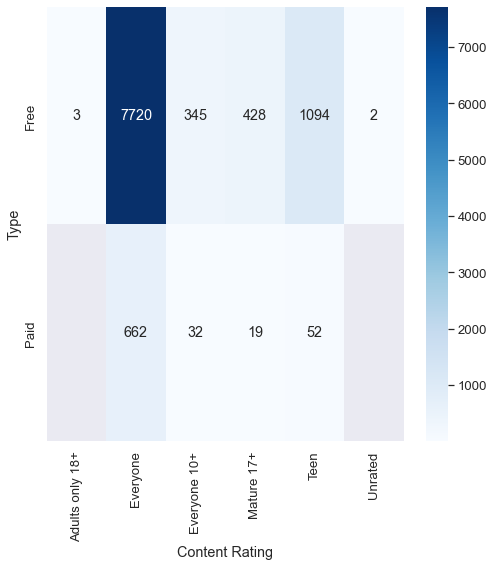

In [118]:
sns.heatmap(df_pivot, annot=True,fmt = '0.0f', cmap = 'Blues')

### 12. How many apps that can work on android version 4?

In [119]:
def check_ver_4 (version):
    try:
        if version.startswith('4'):
            return 'Yes'
        else:
            return 'No'
    except:
        return np.nan

In [120]:
for v in df['Android Ver']:
    print(v)

4.0.3 and up
4.0.3 and up
4.0.3 and up
4.2 and up
4.4 and up
2.3 and up
4.0.3 and up
4.2 and up
3.0 and up
4.0.3 and up
4.1 and up
4.0 and up
4.1 and up
4.4 and up
2.3 and up
4.2 and up
4.1 and up
2.3 and up
4.0.3 and up
4.1 and up
4.1 and up
4.0.3 and up
4.0.3 and up
4.1 and up
4.1 and up
3.0 and up
4.0.3 and up
4.0.3 and up
2.3 and up
2.3 and up
4.0.3 and up
2.3 and up
4.0 and up
4.1 and up
4.1 and up
4.1 and up
4.4 and up
2.3.3 and up
4.0.3 and up
4.0 and up
4.0.3 and up
4.0.3 and up
Varies with device
4.1 and up
4.1 and up
4.1 and up
4.1 and up
4.1 and up
2.3 and up
4.0.3 and up
4.1 and up
4.1 and up
Varies with device
4.1 and up
4.1 and up
4.0 and up
4.4 and up
4.1 and up
2.2 and up
4.4 and up
4.0.3 and up
4.2 and up
4.1 and up
4.0 and up
4.2 and up
4.4 and up
2.3 and up
Varies with device
Varies with device
4.0.3 and up
4.0.3 and up
4.2 and up
5.0 and up
2.3.3 and up
4.0 and up
4.0 and up
4.1 and up
4.0 and up
4.1 and up
4.1 and up
6.0 and up
4.2 and up
5.0 and up
4.0.3 and up
4.

4.1 and up
5.0 and up
4.1 and up
4.1 and up
4.4 and up
Varies with device
4.1 and up
4.1 and up
4.2 and up
4.0.3 and up
4.0.3 and up
5.0 and up
4.4 and up
5.0 and up
4.0.3 and up
5.0 and up
3.0 and up
4.0.3 and up
4.1 and up
5.0 and up
4.0.3 and up
4.1 and up
4.4 and up
5.0 and up
4.4 and up
5.0 and up
4.1 and up
4.4 and up
4.1 and up
4.2 and up
4.0.3 and up
4.0 and up
4.1 and up
4.2 and up
4.1 and up
4.1 and up
4.1 and up
4.1 and up
4.0.3 and up
4.0.3 and up
4.4 and up
4.1 and up
5.0 and up
4.0 and up
4.4 and up
4.0.3 and up
4.0.3 and up
4.1 and up
4.4 and up
4.0 and up
4.0 and up
4.0 and up
4.1 and up
5.1 and up
4.0.3 and up
5.0 and up
4.0.3 and up
4.1 and up
4.4 and up
4.0.3 and up
4.1 and up
4.1 and up
4.0.3 and up
4.1 and up
4.3 and up
4.1 and up
4.4 and up
4.0.3 and up
8.0 and up
Varies with device
4.4 and up
4.3 and up
4.0.3 and up
5.0 and up
3.0 and up
6.0 and up
4.2 and up
3.0 and up
4.0.3 and up
4.0 and up
4.1 and up
4.0.3 and up
3.0 and up
3.0 and up
4.0.3 and up
4.0.3 and u

Varies with device
Varies with device
4.1 and up
4.1 and up
4.3 and up
4.1 and up
4.4 and up
4.0 and up
4.1 and up
4.3 and up
4.0 and up
4.1 and up
4.1 and up
4.1 and up
4.0.3 and up
4.0 and up
2.3 and up
4.1 and up
5.0 and up
2.3.3 and up
4.0 and up
4.1 and up
4.1 and up
Varies with device
4.1 and up
4.0 and up
4.4 and up
4.4 and up
4.1 and up
4.1 and up
2.2 and up
4.0 and up
4.1 and up
3.0 and up
4.1 and up
Varies with device
2.3 and up
4.1 and up
4.4 and up
4.1 and up
2.1 and up
2.3 and up
4.3 and up
4.3 and up
1.6 and up
5.0 and up
Varies with device
4.0.3 and up
4.0 and up
Varies with device
4.1 and up
4.1 and up
4.1 and up
4.4 and up
4.0 and up
4.0 and up
4.0 and up
Varies with device
4.1 and up
2.3 and up
2.3 and up
4.1 and up
Varies with device
Varies with device
Varies with device
Varies with device
2.2 and up
Varies with device
4.0.3 and up
4.1 and up
2.3.3 and up
4.0.3 and up
4.0.3 and up
4.0 and up
Varies with device
2.2 and up
4.0 and up
4.1 and up
4.0.3 and up
4.0.3 and u

4.0 and up
4.4 and up
4.1 and up
4.0.3 and up
2.3.3 and up
4.4 and up
4.0.3 and up
4.1 and up
4.4 and up
4.0 and up
4.1 and up
4.1 and up
4.0 and up
4.0 and up
4.1 and up
4.0 and up
4.0 and up
5.0 and up
4.0 and up
4.0 and up
4.0 and up
2.2 and up
4.1 and up
4.0 and up
Varies with device
4.1 and up
Varies with device
1.6 and up
4.4 and up
5.0 and up
4.2 and up
4.3 and up
2.3.3 and up
4.4 and up
4.1 and up
4.0 and up
4.0 and up
2.2 and up
1.6 and up
4.0 and up
2.3.3 and up
5.0 and up
4.1 and up
4.1 and up
2.2 and up
4.4 and up
4.0.3 and up
3.0 and up
5.0 and up
4.0 and up
4.0.3 and up
4.0.3 and up
4.0 and up
Varies with device
4.0.3 and up
2.3 and up
4.0.3 and up
4.1 and up
4.0.3 and up
4.4 and up
3.0 and up
4.1 and up
2.2 and up
4.1 and up
4.0.3 and up
3.2 and up
4.0 and up
4.1 and up
2.1 and up
4.1 and up
4.1 and up
4.1 and up
4.4 and up
4.2 and up
4.1 and up
4.0 and up
1.6 and up
4.0 and up
4.4 and up
4.0 and up
4.0.3 and up
4.0.3 and up
4.3 and up
4.1 and up
4.4 and up
4.1 and up
4.

4.0 and up
4.1 and up
4.4 and up
4.0.3 and up
1.5 and up
4.0.3 and up
4.1 and up
2.3 and up
4.4W and up
4.2 and up
Varies with device
Varies with device
4.0 and up
Varies with device
Varies with device
4.0 and up
4.2 and up
4.4 and up
Varies with device
4.0.3 and up
2.3.3 and up
4.0 and up
2.3 and up
4.1 and up
2.3 and up
4.1 and up
4.0.3 and up
Varies with device
4.1 and up
2.3.3 and up
4.1 and up
2.1 and up
1.6 and up
4.1 and up
4.1 and up
4.1 and up
4.1 and up
2.3.3 and up
1.5 and up
2.3 and up
Varies with device
2.3.3 and up
5.0 and up
3.2 and up
4.0 and up
4.1 and up
4.1 and up
4.1 and up
4.0.3 and up
5.0 and up
4.3 and up
4.0.3 and up
5.0 and up
2.3 and up
2.3 and up
4.2 and up
4.4 and up
4.0 and up
4.0.3 and up
4.0.3 and up
4.1 and up
2.3 and up
4.1 and up
4.0.3 and up
4.1 and up
4.4 and up
4.0.3 and up
4.4 and up
4.0 and up
4.0 and up
4.0.3 and up
4.0.3 and up
4.1 and up
4.0 and up
4.0.3 and up
4.0 and up
4.1 and up
Varies with device
2.3 and up
4.1 and up
Varies with device
4.

4.0.3 and up
4.1 and up
3.0 and up
1.6 and up
5.0 and up
4.0 and up
4.1 and up
Varies with device
4.1 and up
Varies with device
4.1 and up
5.0 and up
4.1 and up
4.1 and up
2.2 and up
4.0 and up
4.0.3 and up
2.3 and up
4.1 and up
4.0 and up
4.0.3 and up
Varies with device
Varies with device
Varies with device
4.1 and up
Varies with device
Varies with device
4.4 and up
4.1 and up
4.2 and up
Varies with device
Varies with device
4.1 and up
4.0.3 and up
Varies with device
Varies with device
4.0.3 and up
5.0 and up
4.1 and up
4.0.3 and up
4.1 and up
Varies with device
4.0.3 and up
4.1 and up
4.1 and up
Varies with device
4.0 and up
4.0.3 and up
4.0 and up
4.4 and up
2.1 and up
4.0 and up
2.2 and up
4.2 and up
2.3.3 and up
4.0.3 and up
4.0.3 and up
4.1 and up
4.1 and up
2.1 and up
4.1 and up
4.0 and up
4.0.3 and up
4.0.3 and up
4.0.3 and up
4.1 and up
4.1 and up
2.3 and up
2.2 and up
4.4 and up
4.4 and up
Varies with device
2.3 and up
4.3 and up
4.4 and up
4.1 and up
4.4 and up
4.1 and up
2.

In [121]:
check_ver_4('2.3 and up')

'No'

In [122]:
df['app_working_on_Ver_4'] = df['Android Ver'].apply(check_ver_4)

In [123]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day,app_working_on_Ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7,Yes
1,Coloring book moana,Art And Design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,1,Yes
3,Sketch - Draw & Paint,Art And Design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6,8,Yes
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6,20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017,7,25,Yes
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018,7,6,Yes
10838,Parkinson Exercices FR,Medical,4.3,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,2017,1,20,No
10839,The SCP Foundation DB fr nn5n,Books And Reference,4.5,114.0,13.0,"1,000+",Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015,1,19,No


In [124]:
df['app_working_on_Ver_4'].value_counts()

Yes    6699
No     3658
Name: app_working_on_Ver_4, dtype: int64

<AxesSubplot:xlabel='app_working_on_Ver_4', ylabel='count'>

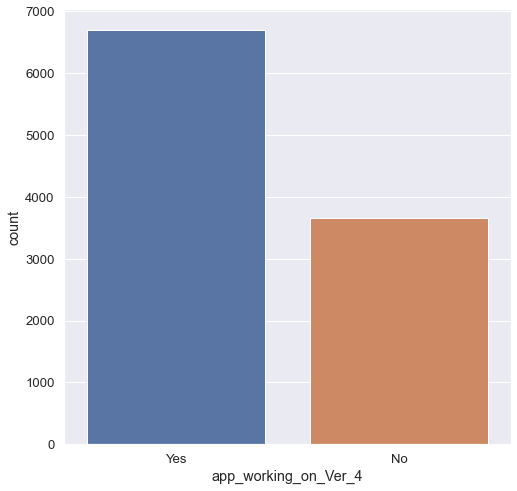

In [125]:
sns.countplot(data = df, x = 'app_working_on_Ver_4')

### 13. Which Category has more free or paid app

In [126]:
x = df.groupby('Category')['Type'].value_counts()

In [127]:
x

Category           Type
Art And Design     Free     62
                   Paid      3
Auto And Vehicles  Free     82
                   Paid      3
Beauty             Free     53
                          ... 
Travel And Local   Paid     12
Video Players      Free    171
                   Paid      4
Weather            Free     74
                   Paid      8
Name: Type, Length: 63, dtype: int64

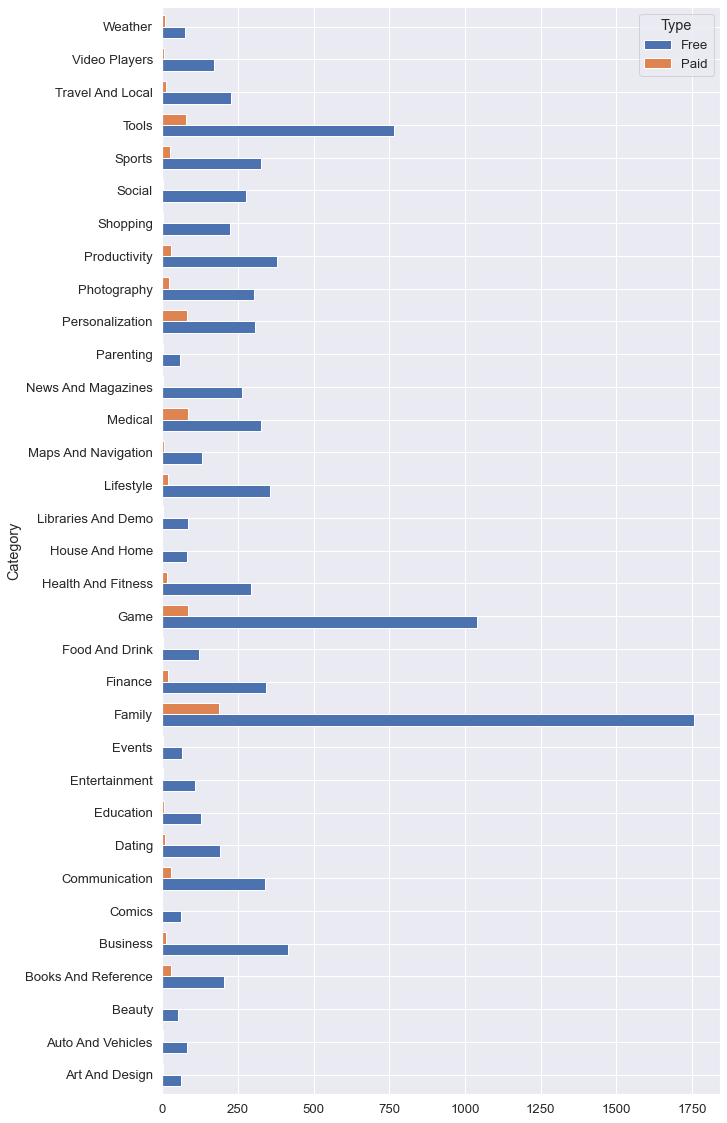

In [133]:
Type_cat = x.unstack().plot.barh(figsize=(10,20), width=0.7)
plt.show()

### 14. What is the most repeated content rating

In [134]:
df.groupby(df['Content Rating'])['Content Rating'].count()

Content Rating
Adults only 18+       3
Everyone           8382
Everyone 10+        377
Mature 17+          447
Teen               1146
Unrated               2
Name: Content Rating, dtype: int64

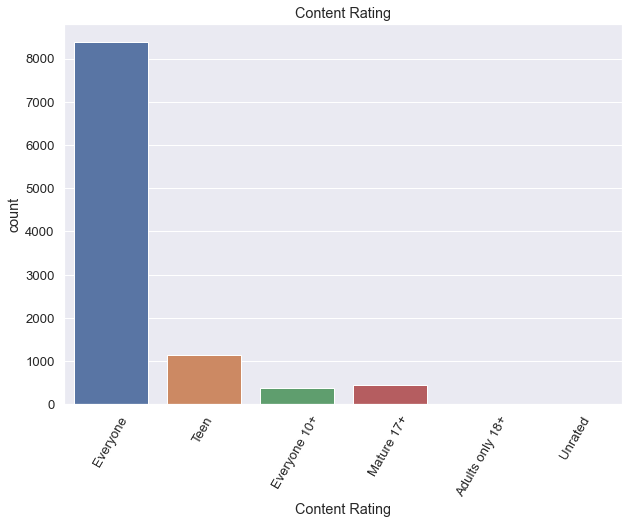

In [135]:
plt.figure(figsize=(10,7))
sns.countplot(data = df, x ='Content Rating')
plt.xticks(rotation = 60)
plt.title('Content Rating')
plt.show()

### 15. Which category getting the highest average rating

In [136]:
rate =  df.groupby('Category')['Rating'].mean().sort_values(ascending = False).max()
rate

4.3953125

<AxesSubplot:xlabel='Category'>

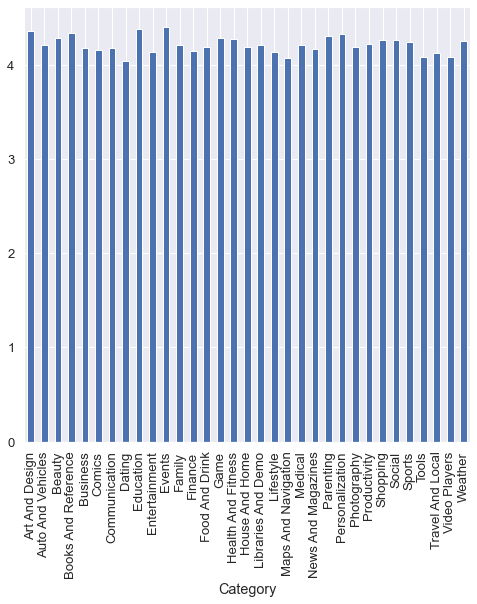

In [138]:
df.groupby('Category')['Rating'].mean().plot(kind = 'bar')

### 16. Which App has maximum reviews

In [139]:
df[df['Reviews'].max() == df['Reviews']]['App']

2544    Facebook
Name: App, dtype: object

### 17. The relation between category and prices

In [140]:
df.groupby('Category')['Price'].sum().sort_values(ascending = False)

Category
Finance                2900.83
Family                 2420.82
Lifestyle              2360.87
Medical                1020.69
Game                    287.30
Tools                   267.25
Productivity            250.93
Business                175.29
Personalization         151.47
Photography             122.23
Books And Reference     119.77
Events                  109.99
Sports                  100.00
Communication            83.14
Health And Fitness       64.35
Travel And Local         49.95
Weather                  32.42
Dating                   31.43
Maps And Navigation      26.95
Education                17.96
Social                   15.97
Auto And Vehicles        13.47
Video Players            10.46
Parenting                 9.58
Food And Drink            8.48
Entertainment             7.98
Art And Design            5.97
Shopping                  5.48
News And Magazines        3.98
Libraries And Demo        0.99
Comics                    0.00
Beauty                    0.00

Text(0, 0.5, 'Price')

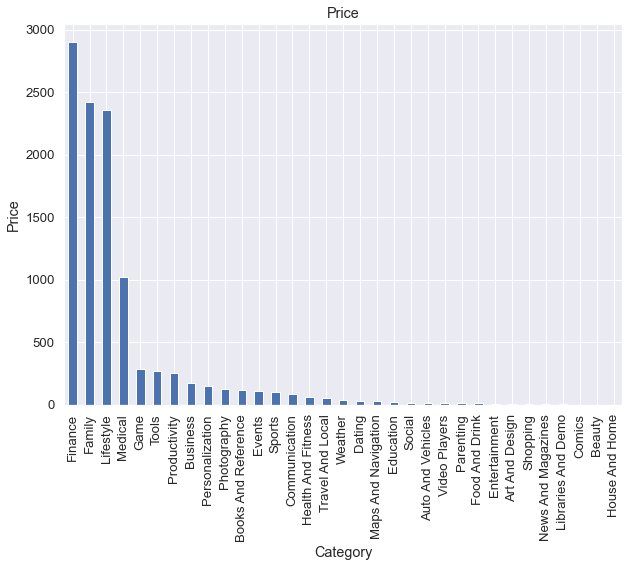

In [141]:
plt.figure(figsize=(10,7))
df.groupby('Category')['Price'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.title('Price')
plt.xlabel('Category')
plt.ylabel('Price')

### 18. How many Apps were issued per year

In [142]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,month,day,app_working_on_Ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,7,Yes
1,Coloring book moana,Art And Design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,15,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,1,Yes
3,Sketch - Draw & Paint,Art And Design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6,8,Yes
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6,20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017,7,25,Yes
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018,7,6,Yes
10838,Parkinson Exercices FR,Medical,4.3,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,2017,1,20,No
10839,The SCP Foundation DB fr nn5n,Books And Reference,4.5,114.0,13.0,"1,000+",Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015,1,19,No


In [143]:
for a in df['App'].unique():
    print (a)

Photo Editor & Candy Camera & Grid & ScrapBook
Coloring book moana
U Launcher Lite – FREE Live Cool Themes, Hide Apps
Sketch - Draw & Paint
Pixel Draw - Number Art Coloring Book
Paper flowers instructions
Smoke Effect Photo Maker - Smoke Editor
Infinite Painter
Garden Coloring Book
Kids Paint Free - Drawing Fun
Text on Photo - Fonteee
Name Art Photo Editor - Focus n Filters
Tattoo Name On My Photo Editor
Mandala Coloring Book
3D Color Pixel by Number - Sandbox Art Coloring
Learn To Draw Kawaii Characters
Photo Designer - Write your name with shapes
350 Diy Room Decor Ideas
FlipaClip - Cartoon animation
ibis Paint X
Logo Maker - Small Business
Boys Photo Editor - Six Pack & Men's Suit
Superheroes Wallpapers | 4K Backgrounds
Mcqueen Coloring pages
HD Mickey Minnie Wallpapers
Harley Quinn wallpapers HD
Colorfit - Drawing & Coloring
Animated Photo Editor
Pencil Sketch Drawing
Easy Realistic Drawing Tutorial
Pink Silver Bow Keyboard Theme
Art Drawing Ideas
Anime Manga Coloring Book
Easy Ori

Low Blood Pressure Symptoms
PatientPORTAL by InteliChart
Hypertension High blood pressure
Fever Care
Facebook
Instagram
Facebook Lite
Messages, Text and Video Chat for Messenger
Tumblr
All Social Networks
Snapchat
Social network all in one 2018
Pinterest
TextNow - free text + calls
Google+
The Messenger App
Messenger Pro
Free Messages, Video, Chat,Text for Messenger Plus
Telegram X
The Video Messenger App
Jodel - The Hyperlocal App
Who Viewed My Facebook Profile - Stalkers Visitors
Hide Something - Photo, Video
Love Sticker
Web Browser & Fast Explorer
LiveMe - Video chat, new friends, and make money
VidStatus app - Status Videos & Status Downloader
Love Images
Web Browser ( Fast & Secure Web Explorer)
SPARK - Live random video chat & meet new people
Golden telegram
Amino: Communities and Chats
Facebook Local
Meet – Talk to Strangers Using Random Video Chat
MobilePatrol Public Safety App
💘 WhatsLov: Smileys of love, stickers and GIF
Phone Tracker : Family Locator
HTC Social Plugin - Fac

Q-slope
Q-Tech Companion App
Q Mobile Banking
Q Quiz SK
Big Q Car Service
Q-See QT View
DataCamp - Learn R, Python & SQL
R Language Reference Guide
Run R Script - Online Statistical Data Analysis
R Programming Language
R Programming
R. Physics Puzzle Game
R Instructor
GT-R R35 Drift Simulator
Offroad Pickup Truck R
Learn R Programming Full
R Programming Tutorial
R Programing Offline Tutorial
Learn R Language Easy Way
.R
R-TYPE II
Guide for R Programming
R Programming Solution
Learn R - Programming Concepts
Learn R Programming
Car Parking Nissan GT-R R35 Simulator
R Quick Reference Big Data
Learn R Programming Free EBook
RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템
R Programming Language (Paperset 2) MCQ Quiz
R-net for Android
R File Manager
R-TYPE
R Studio
Day R Premium
Join R, Community Engagement
R Bank
Elemental Knights R Platinum
Wonder5 Masters R
Neon-R (Red)
Mat|r viewer
R. Lee Ermey's Official Sound
Tutorials for R Programming Offline
R Programming Language (Paperset 1) MCQ Quiz
S Launcher

Bullshite!
Block Strike
Loved by King Bs
BombSquad Remote
BSPlayer
BS CS IT & SE
BSPlayer ARMv7 VFP CPU support
Marked by King Bs
COMSATS BOOK STORE FOR BS(CS)
BS-Mobile
BS Meter (Ad Supported)
BS Calendar / Patro / पात्रो
Simulator Brawl Box for BS
BS Generator
BS Match Maker Premium
BS Films
BS Tractor
BS player remote
BibApp TU BS
King of B.S.
BS Chopper
BS Play
B@dL!bs Lite
BS Battery+
ATC Unico BS
Revista BS
BS MAPS
Beauty Rental Shop
BS Where Am I
Bsc Agri Notes
Love Signal: D-Mate
BSC IT
BS TRACK CLIENT
Kiosko BS
Sleeping Delivery
BS Detector - Diss 'n' Gauges
CABLE SIZE CALCULATOR BS 7671
Corporate B.S. Generator
Banco Sabadell App. Your mobile bank
Strætó.is
VOLT DROP CALCULATOR BS 7671
BSc Ag Entrance Preparation
17th Edition Cable Sizer
Black Survival
Black Social
BTNotification
Little Magnet BT
BT Notifier
Little Magnet BT Pro
Bt Notifier -Smartwatch notice
BT One Voice mobile access
BT One Mobile secure access
BT Communicator
BT One Voice anywhere
BT Find Address for Bluet

nds4droid
MegaNDS (NDS Emulator)
DS file
DS finder
DS get
DS cloud
DS photo
DS video
DS note
DS cam
DS router
EmuBox - Fast Retro Emulator
Synology Drive
DS Creator 2.0
DS App Manager
Simple x3DS Emulator - BETA
DS Helpdesk Plus
DS
Ability DS UNO
DS Connector 2.0
DS Barometer - Altimeter and Weather Information
DS Companion
DS-L4 Viewer
DS Tower Defence
DS-Admin
NDS-controller
DS-11 form
SmartCircle Remote DS
RetroArch
DS Speedometer & Odometer
MegaN64 (N64 Emulator)
DS-20000S
DS Vision
Learn DS [BETA]
Deep Sleep Battery Saver Pro
DS - xR
DS-Students
DS Thermometer
PhotoFrame for Synology DS
Deep Sleep Battery Saver
Draft Simulator for FUT 18
DS Flashlight
DS-82 form
dt Pro
DT
DT Manager
Real Sheet ∞: Pathfinder + DT
DT-CAM
DT Fieldlink
DT Driving Test Theory
DT Smart
Truck Simulator DT 3D
DT Baby Cam
Bloons TD 5
WPBS-DT
ReadyOp DT
Soccer Manager 2018
Online Soccer Manager (OSM)
DT-VR
Dt Tracking
DT Simple Interval Timer
DT Health
DT CLOTHINGS
PAY DT
Test Application DT 02
Eat Right Di

In [144]:
x = df.groupby('year')['App'].count().unique()
x

array([   1,   15,   26,  108,  204,  454,  789, 1826, 6934])

Text(0, 0.5, 'App')

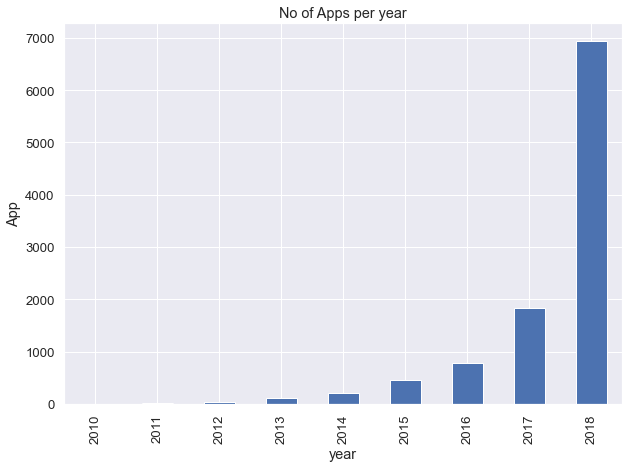

In [145]:
plt.figure(figsize=(10,7))
df.groupby('year')['App'].count().plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.title('No of Apps per year')
plt.xlabel('year')
plt.ylabel('App')